In [41]:
#import required packages

import os
import pandas as p
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.stats import bootstrap


ImportError: cannot import name 'bootstrap' from 'scipy.stats' (/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/__init__.py)

In [2]:
os.getcwd()
os.chdir("/Users/susheel/Documents/GitHub/statistics-for-data-scientists/data")   #FILE DIRECTORY IN QUOTES
#os.listdir()

<ipython-input-46-085c5f7b72ec>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 1).title.set_text('Data')
<ipython-input-46-085c5f7b72ec>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 2).title.set_text('Mean of 5')
<ipython-input-46-085c5f7b72ec>:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

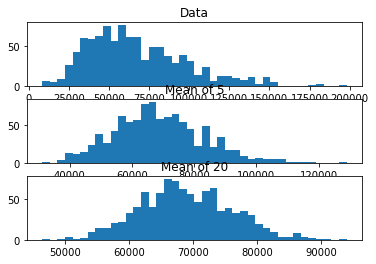

In [46]:
# TASK: demonstrate Central Limit Theorem from sample of 5 and 20 with histograms

df = p.read_csv(filepath_or_buffer = "loans_income.csv")
#read in the datafile

sampled_df = p.DataFrame()
sampled_df['income'], sampled_df['type'] = df['x'].sample(n = 1000, replace = True), 'data_dist'
#simple random sample of 1000 values from dataset, this is just to show the DATA DISTRIBUTION and how its DISTRIBUTION is different from the SAMPLING DISTRIBUTION



sample_size = 5
num_samples = 1000
sampling_results_5 = p.DataFrame({'mean': np.zeros(num_samples)})

for sample_num in range(num_samples): 
    sample = df.sample(sample_size)
    sampling_results_5.loc[sample_num, 'mean'] = sample['x'].mean()
#sample of means of 5 values
#https://statsthinking21.github.io/statsthinking21-python/06-Sampling.html

sample_size = 20
num_samples = 1000
sampling_results_20 = p.DataFrame({'mean': np.zeros(num_samples)})

for sample_num in range(num_samples):
    sample = df.sample(sample_size)
    sampling_results_20.loc[sample_num, 'mean'] = sample['x'].mean()
#sample of means of 20 values

sampling_results_5 = sampling_results_5.rename(columns = {'mean': 'income'})
sampling_results_20 = sampling_results_20.rename(columns = {'mean': 'income'})

sampling_results_5['type'] = 'mean_of_5'
sampling_results_20['type'] = 'mean_of_20'

plt.subplot(3, 1, 1)
plt.hist(sampled_df['income'], bins = 40)
plt.subplot(3, 1, 1).title.set_text('Data')

plt.subplot(3, 1, 2)
plt.hist(sampling_results_5['income'], bins = 40)
plt.subplot(3, 1, 2).title.set_text('Mean of 5')

plt.subplot(3, 1, 3)
plt.hist(sampling_results_20['income'], bins = 40)
plt.subplot(3, 1, 3).title.set_text('Mean of 20')
#not the best way to plot but a different way than chapter 1, and best to suppress the warnings and increase vertical spacing between the histograms

62000.0


(array([3.00e+00, 1.00e+00, 3.61e+02, 1.93e+02, 4.72e+02, 3.84e+02,
        8.57e+03, 1.30e+01, 2.00e+00, 1.00e+00]),
 array([60500. , 60739.5, 60979. , 61218.5, 61458. , 61697.5, 61937. ,
        62176.5, 62416. , 62655.5, 62895. ]),
 <BarContainer object of 10 artists>)

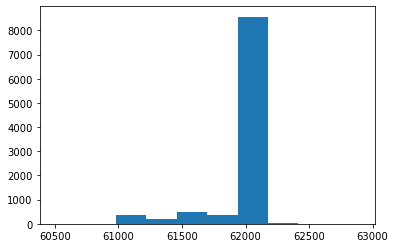

In [50]:
#TASK:  compare median of income from original loans dataset vs a bootstrapped sample

print(np.median(df['x']))
#62000

#df = (df, )
#samples must be in a sequence

sample_median = []
for i in range(10000): 
    sample_n = np.random.choice(df['x'], size = len(df))
    sample_median.append(np.median(sample_n))
    
plt.hist(sample_median)
#it looks like the bootstrap method in scipy is mainly used to calculate confidence intervals of a statistic, in this case, i just wanted the statistic
#REFERENCE: https://datasciencechalktalk.wordpress.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/